### import all the libraries that are needed for data analysis and predictive modelling

In [1]:
# importing libraries for data manudilation
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# importing libraraies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

# importing libraries for data spliting and predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# importing deep learning libaries
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
# import dataset
data=pd.read_csv("loan_data.csv",engine="python")

In [3]:
# overview of data
data.head(2)

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using t...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1


In [4]:
# checkin no of obeservation and features of our dataset

print("dataset has {} rows and {} columns".format(data.shape[0],data.shape[1]))

dataset has 10000 rows and 28 columns


In [5]:
# checking value counts for target variable

data["is_bad"].value_counts()

0    8705
1    1295
Name: is_bad, dtype: int64

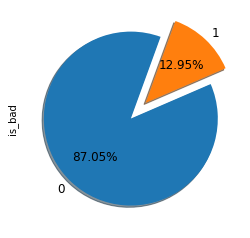

In [6]:
data["is_bad"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                              fontsize=12, startangle=70)

In [7]:
# cheching datatypes od all the features so that we can analyze them accordingly

data.dtypes

Id                               int64
is_bad                           int64
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
Notes                           object
purpose_cat                     object
purpose                         object
zip_code                        object
addr_state                      object
debt_to_income                 float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                        int64
revol_util                     float64
total_acc                      float64
initial_list_status             object
collections_12_mths_ex_me

Text(0.5, 0, 'Column names')

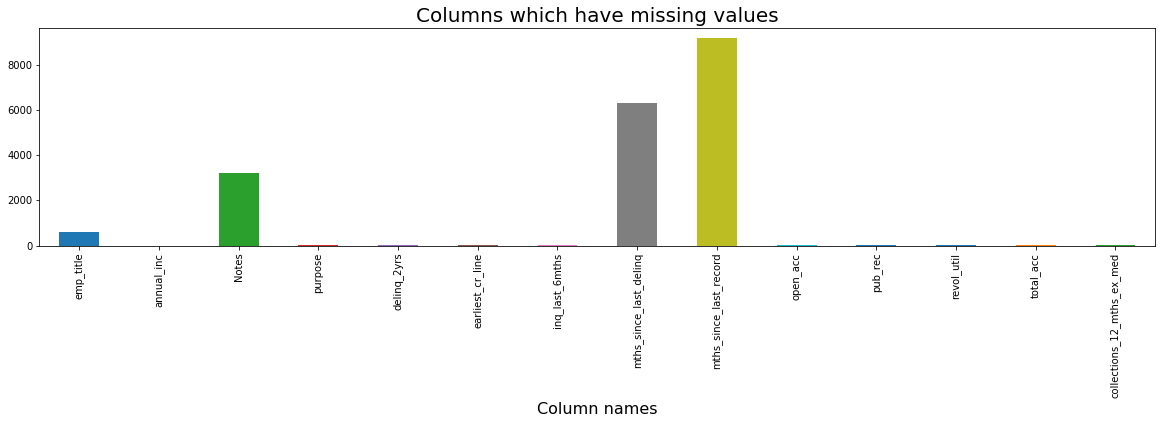

In [8]:
#plotting graph for the columns which have missing values

na_count=data.isnull().sum()
na_count=na_count[na_count.values>0]
plt.figure(figsize=(20,4))
na_count.plot(kind="bar")
plt.title("Columns which have missing values",fontsize=20)
plt.xlabel("Column names",fontsize=16)

### Two columns have more than 60 % and one column have more than 30% so we will remove these three columns because they are not giving us useful information.


In [9]:
# dropping features which have more than 30% null values

data.drop(["mths_since_last_record","mths_since_last_delinq","Notes"],axis=1,inplace=True)

In [10]:
data.head(2)

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,purpose,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,medical,Medical,...,0.0,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,debt consolidation,My Debt Consolidation Loan,...,2.0,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1


In [11]:
# checking no of unique values of categorical columns

for i in data.select_dtypes(["object"]).columns:
    print("column {} has {} unique values".format(i,data[i].nunique()))

column emp_title has 8180 unique values
column emp_length has 14 unique values
column home_ownership has 5 unique values
column verification_status has 3 unique values
column pymnt_plan has 2 unique values
column purpose_cat has 27 unique values
column purpose has 5672 unique values
column zip_code has 720 unique values
column addr_state has 50 unique values
column earliest_cr_line has 463 unique values
column initial_list_status has 2 unique values
column policy_code has 5 unique values


### Deleting columns based on no of unique values
* "emp_title" because it has 8180 unique values so we will delete tis feature.
* "Purpose" has 5672 unique values and it is also same as "purpose_cat" so we will also delete this.
* "zip_code" has 720 unique values and also last two digits are "XX" so we will delete this.
* "earliest_cr_line" has unique values and also date column for past years.

In [12]:
# deleting columns "earliest_cr_line","zip_code","emp_title","purpose" and "Id"

data.drop(["earliest_cr_line","zip_code","emp_title","purpose","Id"],axis=1,inplace=True)

In [13]:
data["initial_list_status"].value_counts()

f    9983
m      17
Name: initial_list_status, dtype: int64

In [14]:
data["pymnt_plan"].value_counts()

n    9998
y       2
Name: pymnt_plan, dtype: int64

In [15]:
data["collections_12_mths_ex_med"].value_counts()

0.0    9968
Name: collections_12_mths_ex_med, dtype: int64

* **delete "collections_12_mths_ex_med" because it has only one value i.e 0**
* **"initial_list_status" and "payment_plan" have one category of more than 99% so we will delete these columns**

In [16]:
# deleting "collections_12_mths_ex_med","initial_list_status" and "pymnt_plan"

data.drop(["collections_12_mths_ex_med","initial_list_status","pymnt_plan"],axis=1,inplace=True)

In [17]:
# checking datatypes of columns which have null values

na_columns=data.isnull().sum()
na_columns=na_columns[na_columns.values>0]
na_columns=data[na_columns.index].dtypes
na_columns

annual_inc        float64
delinq_2yrs       float64
inq_last_6mths    float64
open_acc          float64
pub_rec           float64
revol_util        float64
total_acc         float64
dtype: object

* **we have only numeric column which have null values**
* **So Imputing missing values for numeric variable with thier mean according to target variable**

In [20]:
#imputing null values

for i in data.columns:
    if (data[i].isnull().sum())>0:
        data.loc[(data[i].isnull()) & (data["is_bad"]==0),i]=data.loc[data["is_bad"]==0,i].mean()
        data.loc[(data[i].isnull()) & (data["is_bad"]==1),i]=data.loc[data["is_bad"]==1,i].mean()

In [22]:
# chanfe emp_length to numeric beacuse it is supposed to be numeric

data["emp_length"]=pd.to_numeric(data["emp_length"],errors="coerce")
data.loc[data["emp_length"].isnull(),"emp_length"]=round(data["emp_length"].mean())

In [23]:
# replcaing all categories to "small business" those have category like "%small category%"

data['purpose_cat']=data['purpose_cat'].replace({"small business small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"home improvement small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"major purchase small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"small business small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"educational small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"car small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"house small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"moving small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"debt consolidation small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"vacation small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"wedding small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"medical small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"other small business":"small business"})
data['purpose_cat']=data['purpose_cat'].replace({"credit card small business":"small business"})

In [24]:
# checking various stats for numeric columns

data.describe()

,is_bad,emp_length,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,0.129500,4.988900,68203.107074,13.338704,0.148172,1.066934,9.334585,0.060129,1.427101e+04,48.449759,22.011431,2.002200
std,0.335769,3.404253,48587.823880,6.754212,0.506143,1.475683,4.525458,0.251182,2.543791e+04,28.184028,11.706473,0.810963
min,0.000000,1.000000,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,0.000000,2.000000,40000.000000,8.160000,0.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,1.000000
50%,0.000000,4.000000,58000.000000,13.410000,0.000000,1.000000,9.000000,0.000000,8.645500e+03,48.550000,20.000000,2.000000
75%,0.000000,8.000000,82000.000000,18.692500,0.000000,2.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,3.000000
max,1.000000,33.000000,900000.000000,29.990000,11.000000,25.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,3.000000


In [25]:
# checking some stats on categorical columns

categorical_columns=data.select_dtypes(["object"]).columns
data[categorical_columns].describe()

,home_ownership,verification_status,purpose_cat,addr_state,policy_code
count,10000,10000,10000,10000,10000
unique,5,3,14,50,5
top,RENT,not verified,debt consolidation,CA,PC3
freq,4745,4367,4454,1748,2098


## Univariate Analysis

Text(0.5, 1.0, 'Boxplot for Annual income')

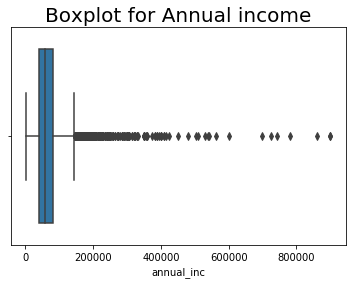

In [26]:
#boxplot for "annual income" feature

sns.boxplot(x=data["annual_inc"])
plt.title("Boxplot for Annual income",fontsize=(20))

In [27]:
# removing outliers from annual_inc features

data.loc[data["annual_inc"]>600000,"annual_inc"]=600000

Text(0.5, 1.0, 'Boxplot for No of inquiries in last 6 months')

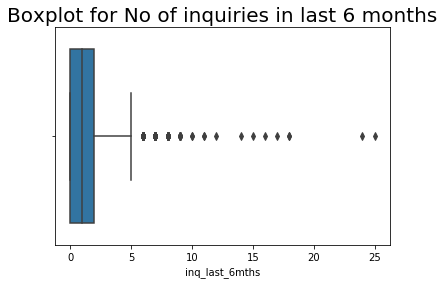

In [28]:
# for "inq_last_6mths"

sns.boxplot(data=data,x="inq_last_6mths")
plt.title("Boxplot for No of inquiries in last 6 months",fontsize=(20))

In [29]:
# changing the values for the outliers

data.loc[data["inq_last_6mths"]>5,"inq_last_6mths"]=5

Text(0.5, 1.0, 'Boxplot for employement length')

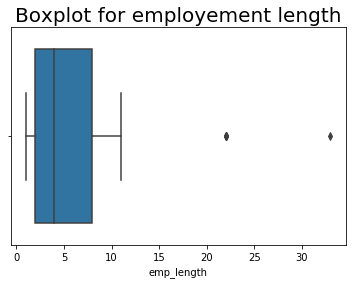

In [30]:
# for "emp_length"

sns.boxplot(x=data["emp_length"])
plt.title("Boxplot for employement length",fontsize=(20))

In [31]:
data=data.loc[data["emp_length"]<15,]

Text(0.5, 1.0, 'Boxplot for debt to income ratio')

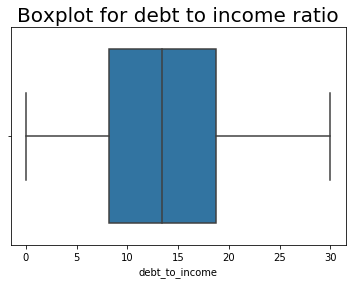

In [32]:
# for "total_acc"

sns.boxplot(x=data["debt_to_income"])
plt.title("Boxplot for debt to income ratio",fontsize=(20))

Text(0.5, 1.0, 'Boxplot for total accounts')

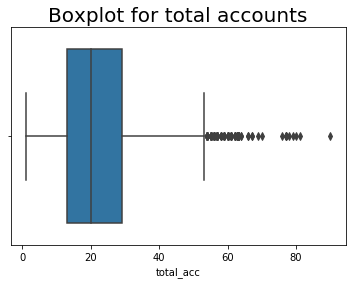

In [33]:
# for "total_acc"

sns.boxplot(x=data["total_acc"])
plt.title("Boxplot for total accounts",fontsize=(20))

Text(0.5, 1.0, 'Distribution plot for annual income')

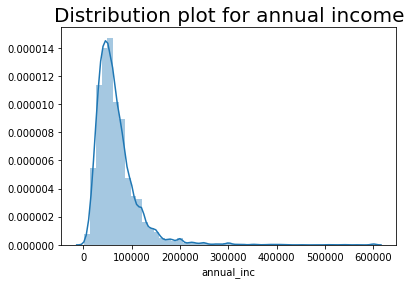

In [34]:
# distribution plot for "annual_inc"

sns.distplot(data["annual_inc"])
plt.title("Distribution plot for annual income",fontsize=20)

Text(0.5, 1.0, 'Distribution plot for Debt to income ratio')

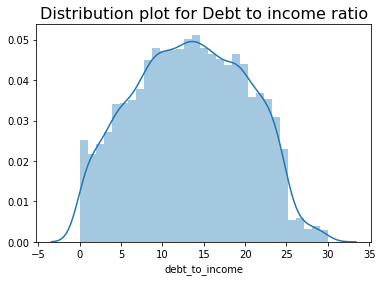

In [35]:
# distribution plot for "debt_to_income"

sns.distplot(data["debt_to_income"])
plt.title("Distribution plot for Debt to income ratio",fontsize=16)

Text(0.5, 1.0, 'distibution plot for total accounts')

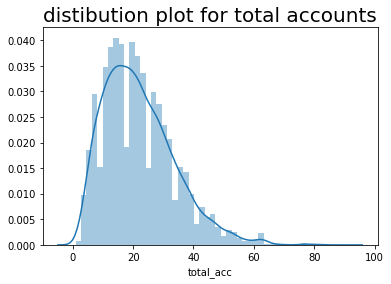

In [36]:
# distribution plot for "total_acc"

sns.distplot(data["total_acc"])
plt.title("distibution plot for total accounts",fontsize=20)

Text(0.5, 1.0, 'distribution plot for Employement length')

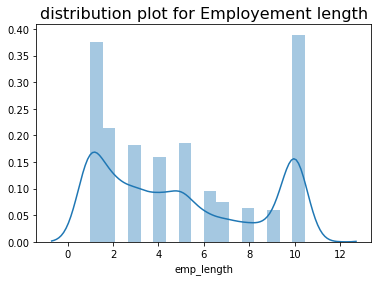

In [37]:
# distribution plot for "emp_length"

sns.distplot(data["emp_length"])
plt.title("distribution plot for Employement length",fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002245982E198>],
      dtype=object)

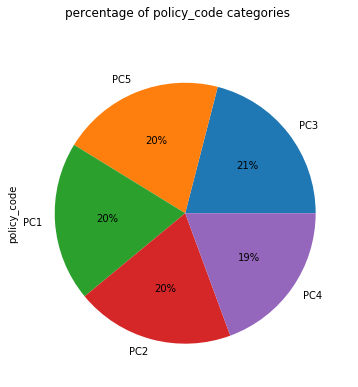

In [38]:
data['policy_code'].value_counts().plot(kind='pie', figsize=(9,6), title='percentage of policy_code categories', subplots=True, autopct='%.f%%')

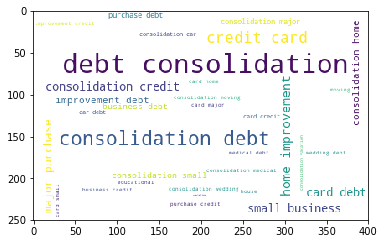

In [39]:
from wordcloud import WordCloud,STOPWORDS
purpose_cat=" ".join(data["purpose_cat"])
wordcloud=WordCloud(stopwords=STOPWORDS,background_color="white",width=400,height=250).generate(purpose_cat)
plt.imshow(wordcloud)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224598978D0>],
      dtype=object)

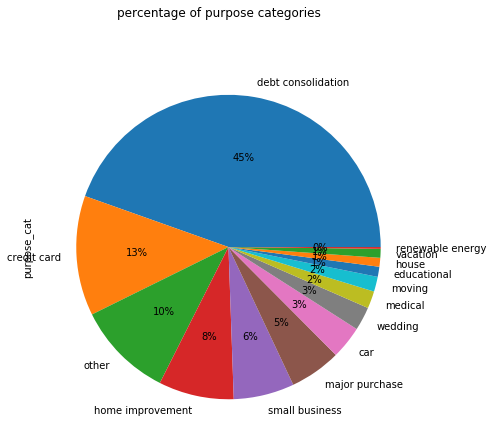

In [40]:
data['purpose_cat'].value_counts().plot(kind='pie', figsize=(11,7), title='percentage of purpose categories', subplots=True, autopct='%.f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224598B7470>],
      dtype=object)

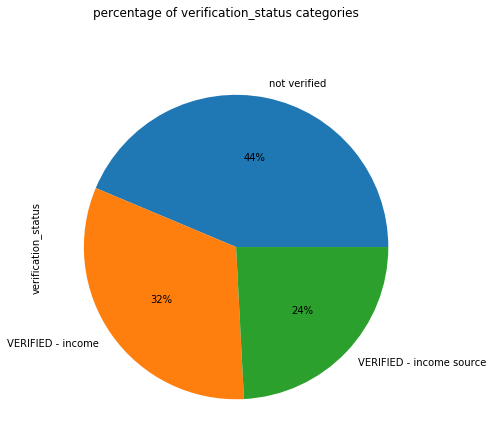

In [41]:
data['verification_status'].value_counts().plot(kind='pie', figsize=(11,7), title='percentage of verification_status categories', subplots=True, autopct='%.f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224598C8208>],
      dtype=object)

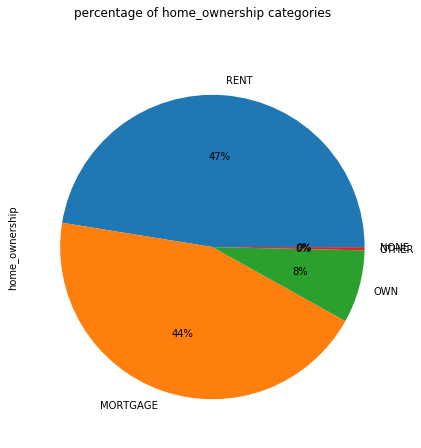

In [42]:
data['home_ownership'].value_counts().plot(kind='pie', figsize=(11,7), title='percentage of home_ownership categories', subplots=True, autopct='%.f%%')

## Bivariate Analysis

Text(0, 0.5, 'count of customers')

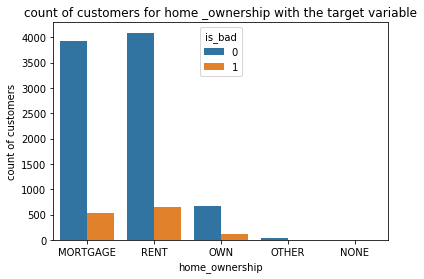

In [43]:
# check home ownership categories with respect to target variable

sns.countplot(data=data,x="home_ownership",hue="is_bad")
plt.title("count of customers for home _ownership with the target variable",fontsize=12)
plt.ylabel("count of customers")

In [44]:
#Exploring the loan_status x purpose
purp_loan= ['purpose_cat', 'is_bad']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(data[purp_loan[0]], data[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

is_bad,0,1
purpose_cat,,
car,3.68,2.17
credit card,13.44,7.99
debt consolidation,45.17,40.5
educational,1.16,0.47
home improvement,8.2,6.59
house,1.01,0.47
major purchase,5.69,3.96
medical,1.82,1.94
moving,1.65,1.09


Text(0, 0.5, 'count of customers')

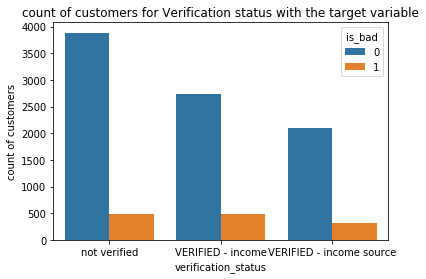

In [45]:
# check verification status of income with respect to target variable

sns.countplot(data=data,x="verification_status",hue="is_bad")
plt.title("count of customers for Verification status with the target variable",fontsize=12)
plt.ylabel("count of customers")

Text(0, 0.5, 'count of customers')

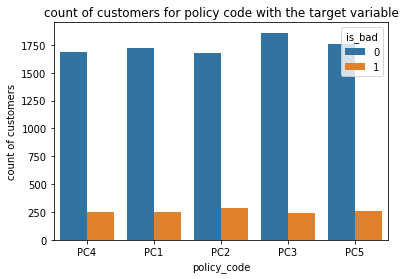

In [47]:
# check policy code categories with respect to target variable

sns.countplot(data=data,x="policy_code",hue="is_bad")
plt.title("count of customers for policy code with the target variable",fontsize=12)
plt.ylabel("count of customers")

Text(0, 0.5, 'count of customers')

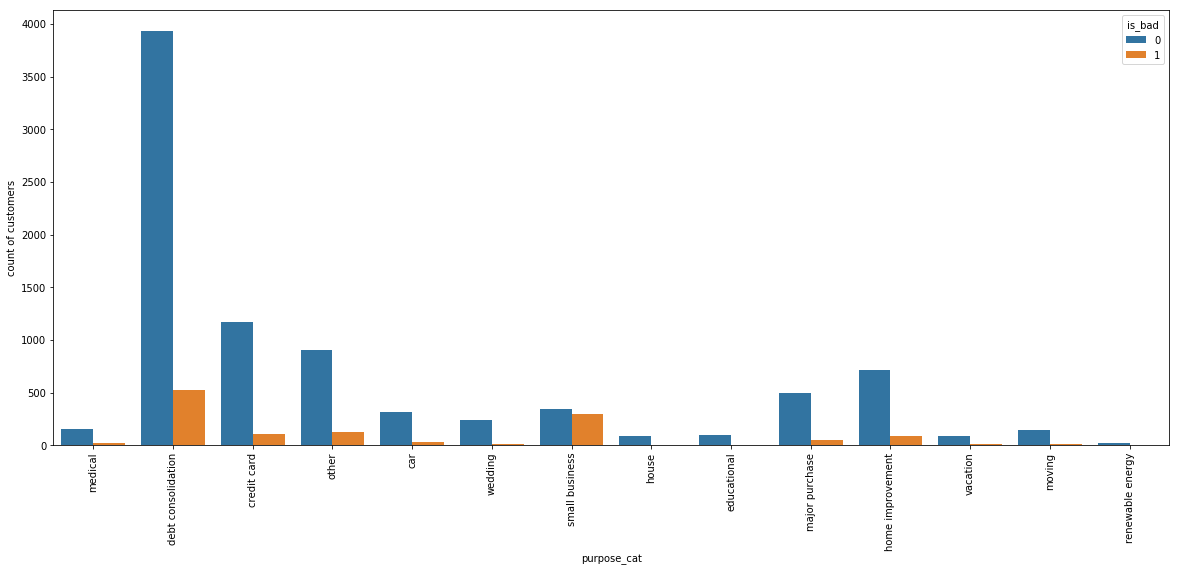

In [48]:
# check purpose of loan categories with respect to target variable

plt.figure(figsize=(20,8))
sns.countplot(data=data,x="purpose_cat",hue="is_bad")
plt.xticks(rotation="vertical")
plt.ylabel("count of customers")

In [ ]:
sns.boxplot(data =data, x='purpose_cat', y='annual_inc', hue ='is_bad')

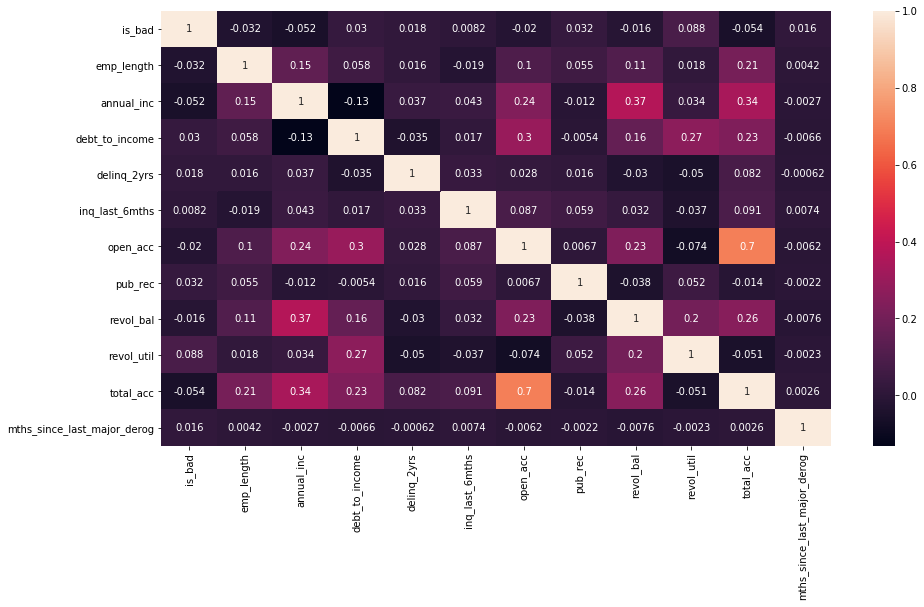

In [49]:
# plotting graph to check the correlation between numeric variables

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [50]:
data.groupby(["is_bad"])["annual_inc"].mean()

is_bad
0    69007.982894
1    61703.286765
Name: annual_inc, dtype: float64

In [51]:
# checkin no of obeservation and features of our dataset

print("now our dataset has {} rows and {} columns".format(data.shape[0],data.shape[1]))

now our dataset has 9994 rows and 17 columns


### convert the categorical columns into dummy variable to make a model

In [52]:
for i in data.select_dtypes(["object"]).columns:
    new=pd.get_dummies(data[i],prefix=i,)
    del data[i]
    data=pd.concat([data,new],axis=1)

In [53]:
data.head()

,is_bad,emp_length,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,policy_code_PC1,policy_code_PC2,policy_code_PC3,policy_code_PC4,policy_code_PC5
0,0,10.0,50000.0,10.87,0.0,0.0,15.0,0.0,12087,12.1,...,0,0,0,0,0,0,0,0,1,0
1,0,1.0,39216.0,9.15,0.0,2.0,4.0,0.0,10114,64.0,...,0,0,0,0,0,1,0,0,0,0
2,0,4.0,65000.0,11.24,0.0,0.0,4.0,0.0,81,0.6,...,0,0,0,0,0,0,0,0,1,0
3,0,10.0,57500.0,6.18,1.0,0.0,6.0,0.0,10030,37.1,...,0,0,0,0,0,0,1,0,0,0
4,0,10.0,50004.0,19.03,0.0,4.0,8.0,0.0,10740,40.4,...,0,0,0,0,0,0,0,1,0,0


#### splitting the data into train and test.so that we can make a model on train and validate on test
* we divide train and test data with 75 % and 25% respectively

In [54]:
# using train_test_split to divide the data

train,test=train_test_split(data,test_size=.25,random_state=2)

In [55]:
# splitting the dependent variable and target variable

x_train=train.drop(["is_bad"],axis=1)
y_train=train["is_bad"]
x_test=test.drop(["is_bad"],axis=1)
y_test=test["is_bad"]

#### try logistic regression on the data

In [57]:
params_lr={"class_weight":["balanced",None],
       "penalty":["l1","l2"],
       "C":np.linspace(0.1,100,50)}

In [58]:
lr=LogisticRegression(class_weight="balanced")
grid_search=GridSearchCV(lr,param_grid=params_lr,cv=5,scoring="roc_auc")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': ['balanced', None], 'penalty': ['l1', 'l2'], 'C': array([  0.1    ,   2.13878,   4.17755,   6.21633,   8.2551 ,  10.29388,
        12.33265,  14.37143,  16.4102 ,  18.44898,  20.48776,  22.52653,
        24.56531,  26.60408,  28.64286,  30.68163,  32.72041,  34.75918,
   ...     85.72857,  87.76735,  89.80612,  91.8449 ,  93.88367,  95.92245,
        97.96122, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [61]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.692 (std: 0.011)
Parameters: {'C': 20.487755102040822, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.691 (std: 0.014)
Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

Model with rank: 3
Mean validation score: 0.691 (std: 0.013)
Parameters: {'C': 59.22448979591837, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.691 (std: 0.015)
Parameters: {'C': 63.30204081632654, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.691 (std: 0.011)
Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}



In [62]:
grid_search.best_estimator_

LogisticRegression(C=20.487755102040822, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [65]:
lr=LogisticRegression(C=20.487755102040822, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
lr.fit(x_train,y_train)
p_lr=lr.predict(x_test)
roc_auc_score(y_test,p_lr)

0.6069351900376831

In [67]:
p_lr=lr.predict_proba(x_test)[:,1]
cutoff=np.linspace(0.001,.999,999)
real=y_test
roc=[]
for c in cutoff:
    predicted=(p_lr>c).astype(int)
    score=roc_auc_score(real,predicted)
    roc.append(score)
cutoff[roc==max(roc)],max(roc)

(array([0.481]), 0.6138811942136042)

In [69]:
prediction=(p_lr>0.481).astype(int)

In [70]:
confusion_matrix(y_test,prediction)

array([[1456,  710],
       [ 148,  185]], dtype=int64)

## Random Forest

In [74]:
# making object of RandomForestClassifier

rf=RandomForestClassifier(class_weight="balanced")
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [76]:
# checking the feature importance for the features so that we can remove unimportant variables based on that

d=pd.DataFrame({"features":x_train.columns,"feature_importance":rf.feature_importances_})
d.sort_values("feature_importance",ascending=True)

,features,feature_importance
74,addr_state_TN,0.000000
54,addr_state_ME,0.000000
12,home_ownership_NONE,0.000000
58,addr_state_MS,0.000007
46,addr_state_ID,0.000011
45,addr_state_IA,0.000020
48,addr_state_IN,0.000034
61,addr_state_NE,0.000036
78,addr_state_VT,0.000110
82,addr_state_WY,0.000254


In [77]:
# removing features which have very low feature importance


x_train.drop(["addr_state_WY","addr_state_WV","addr_state_VT","addr_state_UT","addr_state_TN","addr_state_SD",
"addr_state_RI","addr_state_NH","addr_state_NE","addr_state_MT","addr_state_MS","addr_state_ME",
"addr_state_IN","addr_state_ID","addr_state_IA","addr_state_HI","addr_state_DE","addr_state_DC",
"purpose_cat_renewable energy","home_ownership_NONE","home_ownership_NONE"],axis=1,inplace=True)
x_test.drop(["addr_state_WY","addr_state_WV","addr_state_VT","addr_state_UT","addr_state_TN","addr_state_SD",
"addr_state_RI","addr_state_NH","addr_state_NE","addr_state_MT","addr_state_MS","addr_state_ME",
"addr_state_IN","addr_state_ID","addr_state_IA","addr_state_HI","addr_state_DE","addr_state_DC",
"purpose_cat_renewable energy","home_ownership_NONE","home_ownership_NONE"],axis=1,inplace=True)

In [78]:
# parameters for randomforest

params={"n_estimators":[50,100,200,300,500],
       "class_weight":["balanced",None],
       "criterion":["gini","entropy"],
       "bootstrap":[True,False],
       "max_depth":[20,25,30,40,50],
       "min_samples_split":[2,3,4,5,6],
       "min_samples_leaf":[1,2,3,4,5],
       "max_features":[10,15,20,30,50]}

In [79]:
rf=RandomForestClassifier()
random_search_rf=RandomizedSearchCV(rf,param_distributions=params,cv=5,scoring="roc_auc",n_iter=200)
random_search_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 200, 300, 500], 'class_weight': ['balanced', None], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'max_depth': [20, 25, 30, 40, 50], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': [10, 15, 20, 30, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scorin

In [80]:
report(random_search_rf.cv_results_,5)

Model with rank: 1
Mean validation score: 0.712 (std: 0.021)
Parameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 20, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.711 (std: 0.015)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 10, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.711 (std: 0.018)
Parameters: {'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 15, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.710 (std: 0.016)
Parameters: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 10, 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with ran

In [ ]:
'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 10, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True

In [82]:
rf=RandomForestClassifier(n_estimators=500,min_samples_split=2
                         ,min_samples_leaf=3,max_features=10,max_depth=50,
                         criterion="entropy",class_weight="balanced",bootstrap=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=50, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [83]:
p_rf=rf.predict(x_test)
roc_auc_score(y_test,p_rf)

0.5725399915150609

In [84]:
p_rf=rf.predict_proba(x_test)[:,1]
cutoff=np.linspace(0.001,.999,999)
real=y_test
roc=[]
for c in cutoff:
    predicted=(p_rf>c).astype(int)
    score=roc_auc_score(real,predicted)
    roc.append(score)
cutoff[roc==max(roc)],max(roc)

(array([0.301]), 0.6227051150873866)

In [85]:
prediction_rf=(p_rf>0.301).astype(int)
confusion_matrix(y_test,prediction_rf)

array([[1891,  275],
       [ 209,  124]], dtype=int64)

In [99]:
y_test.value_counts()

0    2166
1     333
Name: is_bad, dtype: int64

## XGBoost

In [86]:
params_xg={"n_estimators":[50,80,100,150,20],
       "max_depth":[2,3,4,5,6],
       "subsample":[.6,.7,.8,.9,1],
       "colsample_bytree":[.6,.7,.8,.9,1],
       "colsample_bylevel":[.6,.7,.8,.9,1],
       "colsample_bynode":[.6,.7,.8,.9,1],
       "learning_rate":[.01,.05,.1,.15,.20],
       "scale_pos_weight":[1,2,3,4],
       "gamma":[.1,.2,.3]}

In [88]:
xg=XGBClassifier(objective="binary:logistic")
random_search_xg=RandomizedSearchCV(xg,param_distributions=params_xg,cv=5,scoring="roc_auc",n_iter=150)
random_search_xg.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=150, n_jobs=None,
          param_distributions={'n_estimators': [50, 80, 100, 150, 20], 'max_depth': [2, 3, 4, 5, 6], 'subsample': [0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1], 'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1], 'colsample_bynode': [0.6, 0.7, 0.8, 0.9, 1], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'scale_pos_weight': [1, 2, 3, 4], 'gamma': [0.1, 0.2, 0.3]},
          pre_dispatch='2*n_jobs', random_stat

In [89]:
report(random_search_xg.cv_results_,5)

Model with rank: 1
Mean validation score: 0.713 (std: 0.015)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.7, 'colsample_bynode': 0.9, 'colsample_bylevel': 0.6}

Model with rank: 2
Mean validation score: 0.712 (std: 0.018)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9, 'colsample_bynode': 0.7, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.711 (std: 0.016)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6, 'colsample_bynode': 0.6, 'colsample_bylevel': 0.6}

Model with rank: 4
Mean validation score: 0.710 (std: 0.020)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 3, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_byt

In [92]:
xg=XGBClassifier(objective="binary:logistic",scale_pos_weight=5,n_estimators=100,
                max_depth=2,learning_rate=0.15,gamma=0.1,colsample_bytree=0.7,colsample_bynode=.9,
                 colsample_bylevel=.6)
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bynode=0.9, colsample_bytree=0.7, gamma=0.1,
       learning_rate=0.15, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
       silent=None, subsample=1, verbosity=1)

In [93]:
p_xg=xg.predict(x_test)
roc_auc_score(y_test,p_xg)

0.6180779117067206

In [94]:
p_xg=xg.predict_proba(x_test)[:,1]
cutoff=np.linspace(0.001,.999,999)
real=y_test
roc=[]
for c in cutoff:
    predicted=(p_xg>c).astype(int)
    score=roc_auc_score(real,predicted)
    roc.append(score)
cutoff[roc==max(roc)],max(roc)

(array([0.417]), 0.6424970677048238)

In [100]:
prediction_xg=(p_xg>0.417).astype(int)
confusion_matrix(y_test,prediction_xg)

array([[1632,  534],
       [ 156,  177]], dtype=int64)